In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

In [2]:
data = pd.read_csv("NCI60_X.csv", index_col = 0)

In [3]:
data

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V60,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,-0.400019,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000
V61,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,-0.560020,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000
V62,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.160020,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000
V63,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,0.065019,...,0.889980,-0.420000,-0.460000,-0.855000,-0.160020,-0.350000,-0.360010,-0.490000,0.010000,-1.720000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, V1 to V64
Columns: 6830 entries, 1 to 6830
dtypes: float64(6830)
memory usage: 3.3+ MB


In [5]:
data1 = pd.DataFrame(scale(data))
data1.shape

(64, 6830)

# Clustering

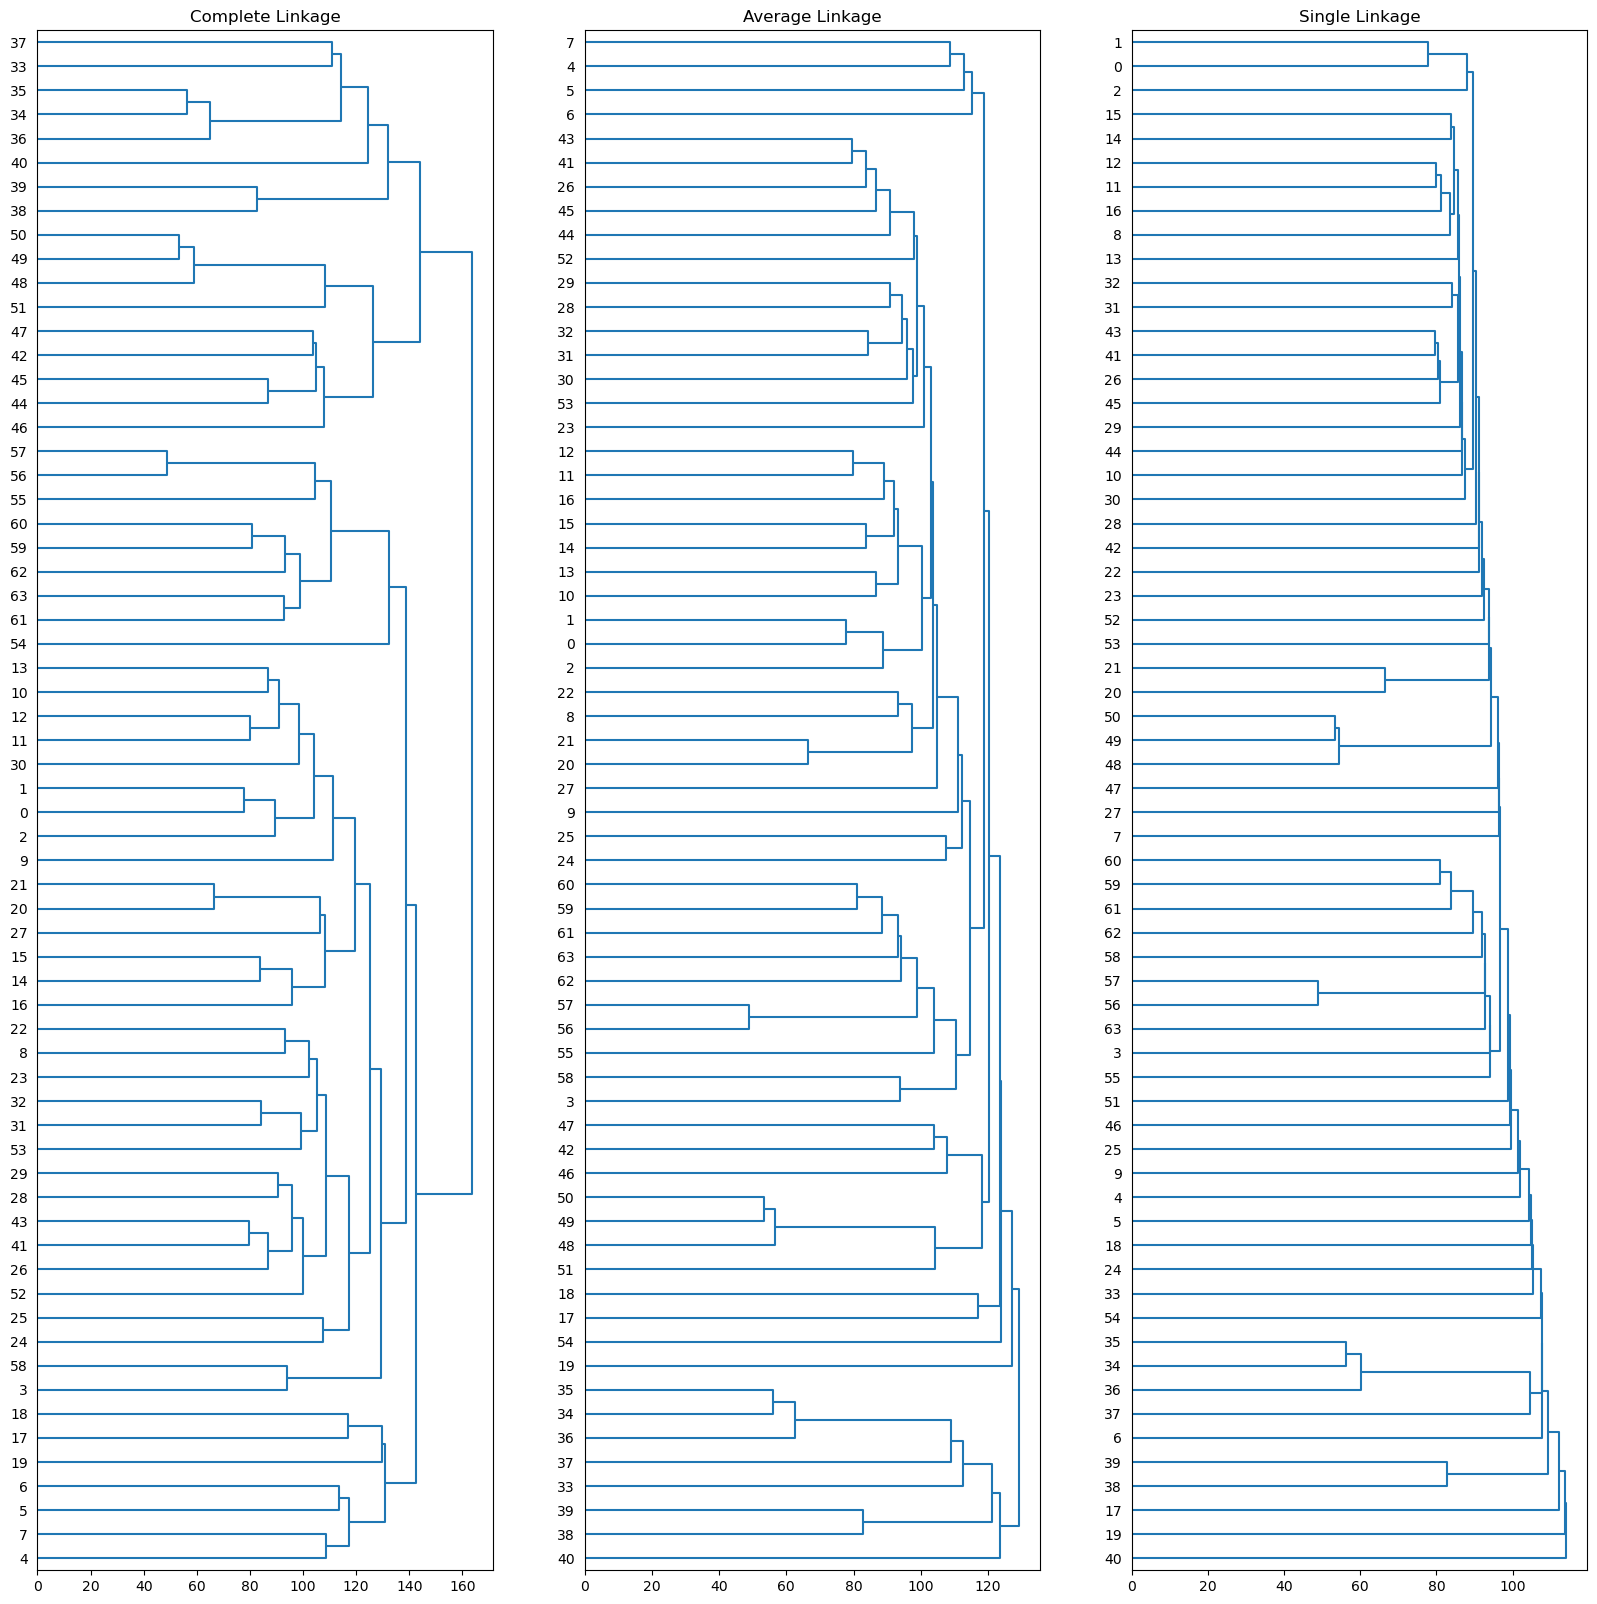

In [6]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,20))

for linkage, cluster, ax in zip([hierarchy.complete(data1), hierarchy.average(data1), hierarchy.single(data1)],
                                ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, labels=data1.index, orientation='right', color_threshold=0, leaf_font_size=10, ax=ax)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

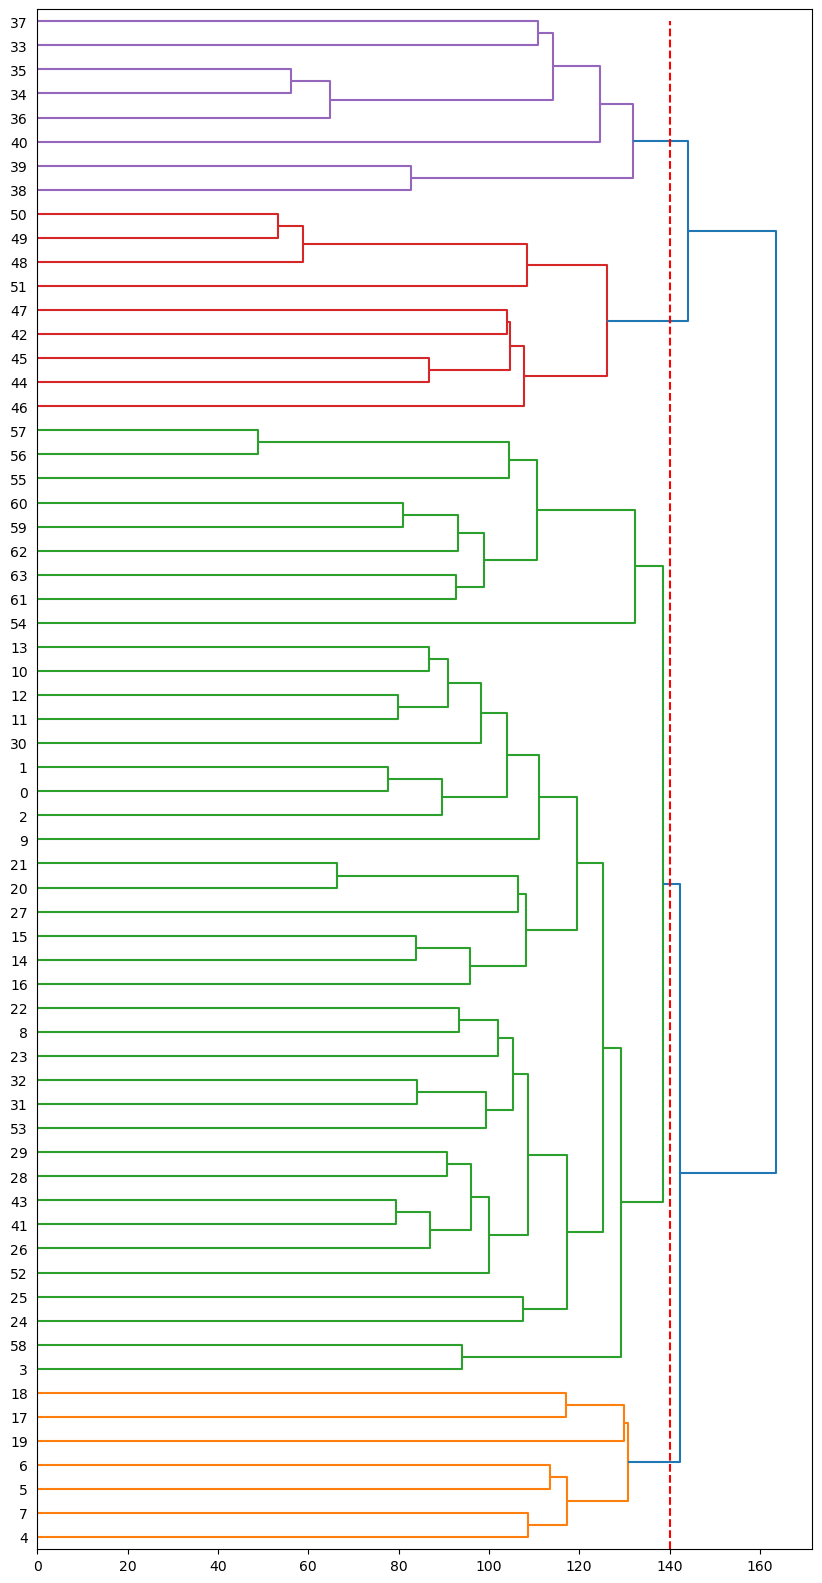

In [7]:
plt.figure(figsize=(10,20))
cut4 = hierarchy.dendrogram(hierarchy.complete(data1),
                            labels=data1.index, orientation='right', color_threshold=140, leaf_font_size=10)
plt.vlines(140,0,plt.gca().yaxis.get_data_interval()[1], colors='r', linestyles='dashed');

# KMean

In [8]:
np.random.seed(2)
km4 = KMeans(n_clusters=4, n_init=50)
km4.fit(data1)

C:\Users\sgv30\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init=50)

In [9]:
km4.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [10]:
# Observations per KMeans cluster
pd.Series(km4.labels_).value_counts().sort_index()

0     8
1    23
2    24
3     9
dtype: int64

# PCA

In [11]:
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(data1))

In [12]:
df2_plot.shape

(64, 64)

In [13]:
pc_data = pd.DataFrame(df2_plot)

In [14]:
pc_data.shape

(64, 64)

In [15]:
pc_data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-19.838042,-3.555636,-9.812399,-0.824246,12.609984,7.471505,14.190730,-3.197977,21.938350,-20.369363,...,-3.571612,-11.111674,6.336264,9.077897,-3.892561,-3.240788,0.446627,0.392266,-0.894904,1.236942e-14
1,-23.089215,-6.441460,-13.478251,5.635308,8.035496,3.715178,10.143225,-7.292724,22.338284,-13.119764,...,3.378131,5.232259,-6.325341,-7.665590,3.938798,4.018298,-0.617127,-0.776330,0.969009,1.236942e-14
2,-27.456114,-2.465143,-3.533054,-1.341673,12.564846,17.344925,10.354857,-2.671282,-0.234926,-6.357967,...,1.299500,5.323021,-4.867172,-0.044978,2.027836,-1.089818,-1.695444,0.498405,-0.844418,1.236942e-14
3,-42.816801,9.768358,-0.890073,3.445043,42.269904,27.238815,17.520642,-0.554341,14.264354,15.969204,...,-0.342635,-1.117879,2.511719,6.390061,-3.429572,-0.705737,-1.372244,1.427329,0.735637,1.236942e-14
4,-55.418530,5.198897,-21.094558,15.849712,10.443273,12.991051,12.597895,32.513096,-7.896805,-10.177263,...,-0.264565,-2.311955,2.926478,-1.870319,2.295689,0.614378,2.577214,-0.557610,-0.576024,1.236942e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-17.996242,47.242414,5.398941,-17.405145,-0.293594,-7.429801,-15.572290,22.270195,-2.897352,22.387769,...,-0.799871,-12.253771,5.017202,8.529950,4.263580,-3.510030,-3.253202,1.358311,-0.379709,1.236942e-14
60,-4.415510,42.309563,8.715183,-2.805833,5.716318,-3.375639,-11.918083,6.707284,1.845688,3.411293,...,-9.943943,13.037002,5.703453,-9.154761,-3.763392,3.066959,1.931465,-0.929279,-0.469700,1.236942e-14
61,-22.966988,36.102038,18.116579,-7.579957,5.874271,0.570517,-7.703801,-5.585683,-5.160482,13.450721,...,-9.992050,2.294835,-4.471902,3.623403,-1.155455,0.069896,0.090374,-0.337372,-0.268801,1.236942e-14
62,-19.176007,50.398441,4.211153,-3.041732,-8.347417,-3.660122,-2.023234,11.885016,-4.124961,-12.922132,...,4.893907,1.925993,-2.909624,-1.026299,-5.466240,1.499262,-0.317515,-1.515080,1.011507,1.236942e-14


In [16]:
pc_data.corr().round(1)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,...,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0
1,-0.0,1.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,...,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
2,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.1
3,-0.0,0.0,-0.0,1.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
4,-0.0,0.0,-0.0,0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,...,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,...,-0.0,0.0,-0.0,-0.0,0.0,1.0,-0.0,-0.0,0.0,-0.3
60,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,1.0,-0.0,0.0,0.3
61,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0,0.2
62,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.3


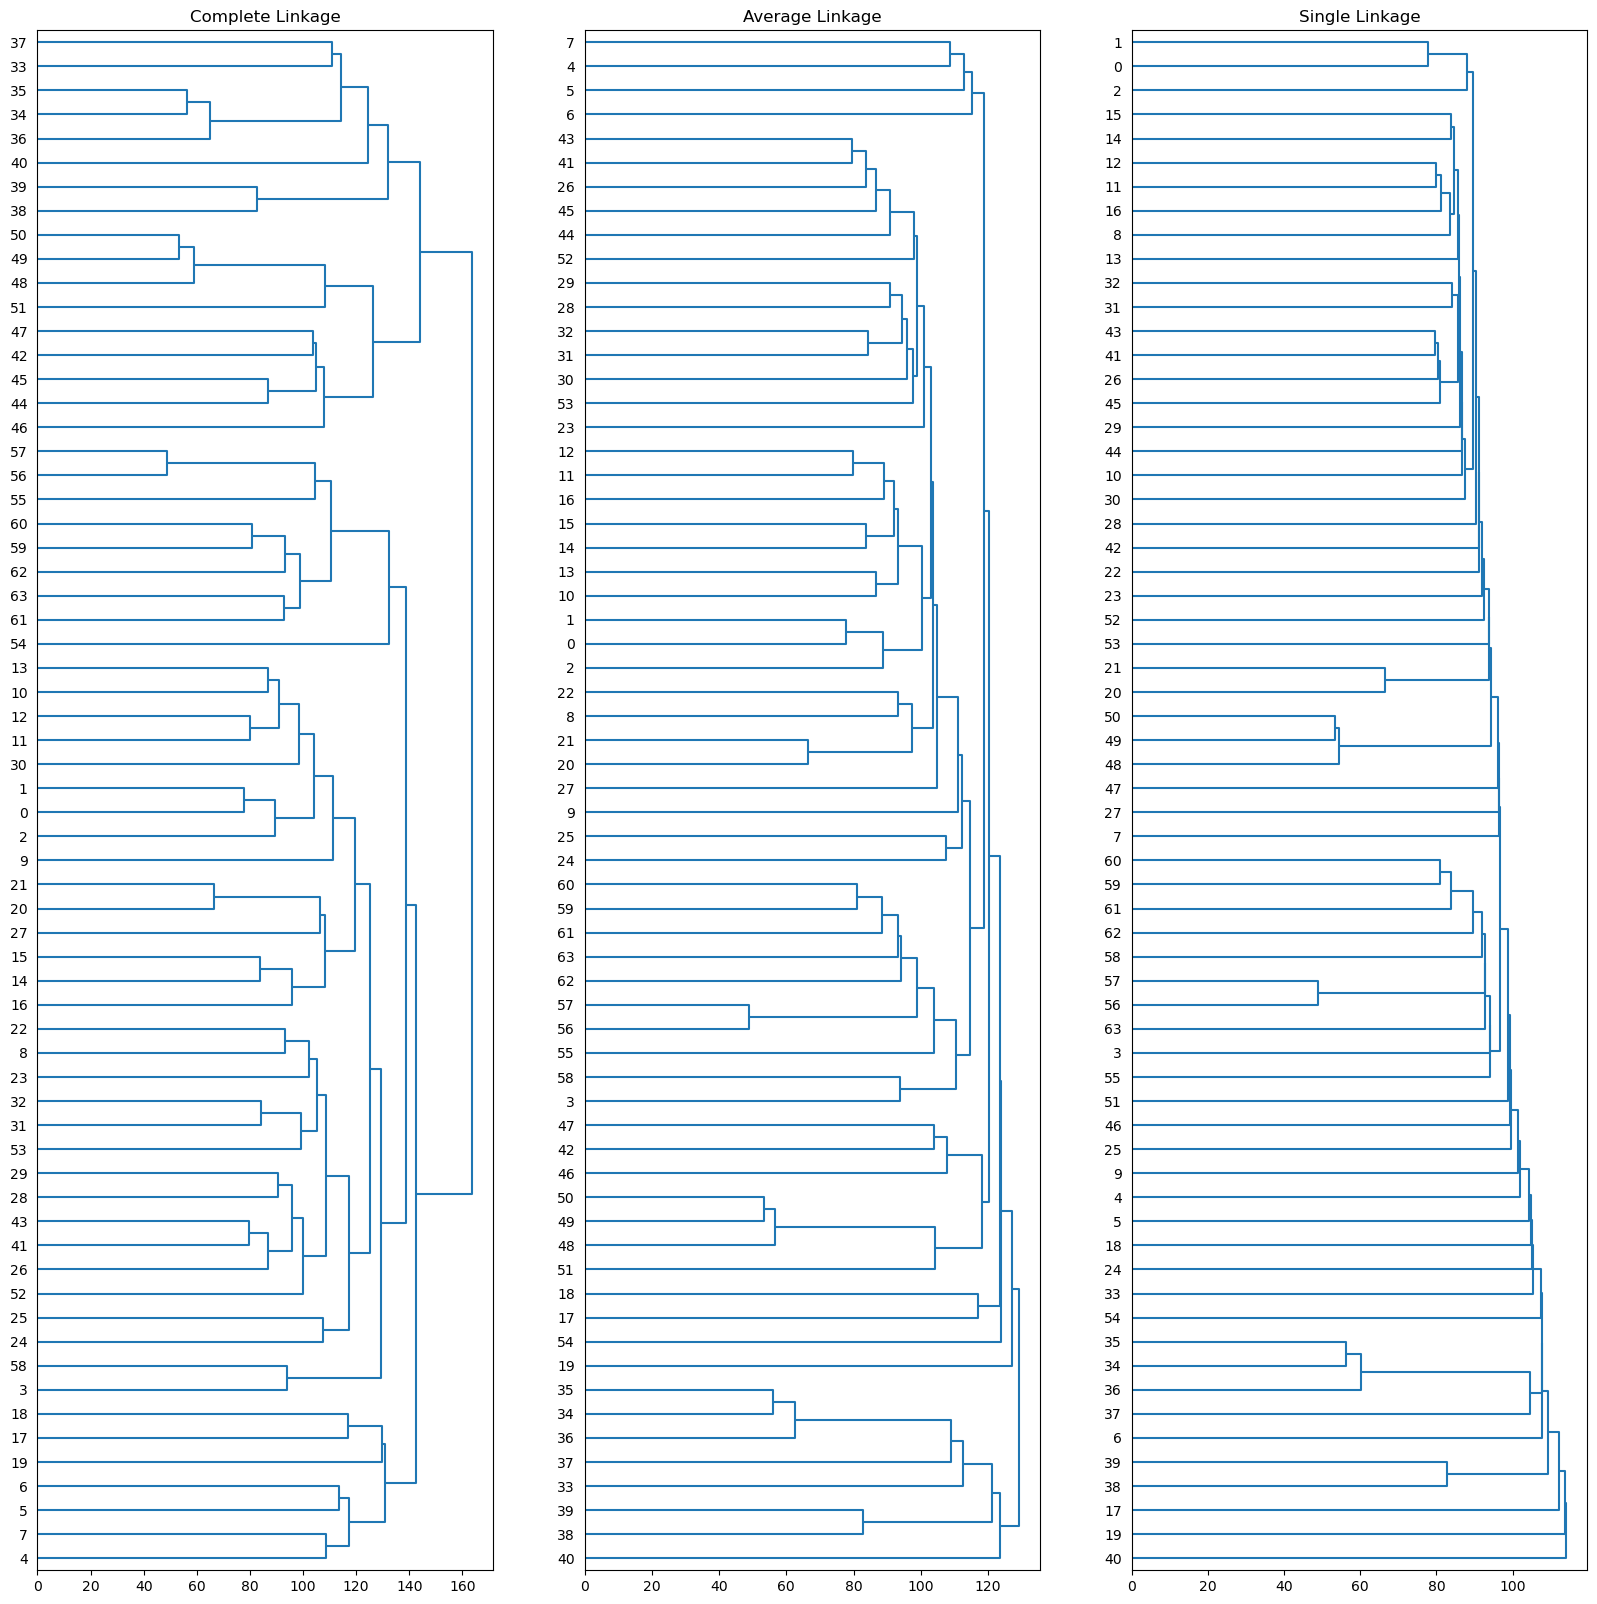

In [17]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,20))

for linkage, cluster, ax in zip([hierarchy.complete(pc_data), hierarchy.average(pc_data), hierarchy.single(pc_data)],
                                ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, labels=pc_data.index, orientation='right', color_threshold=0, leaf_font_size=10, ax=ax)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

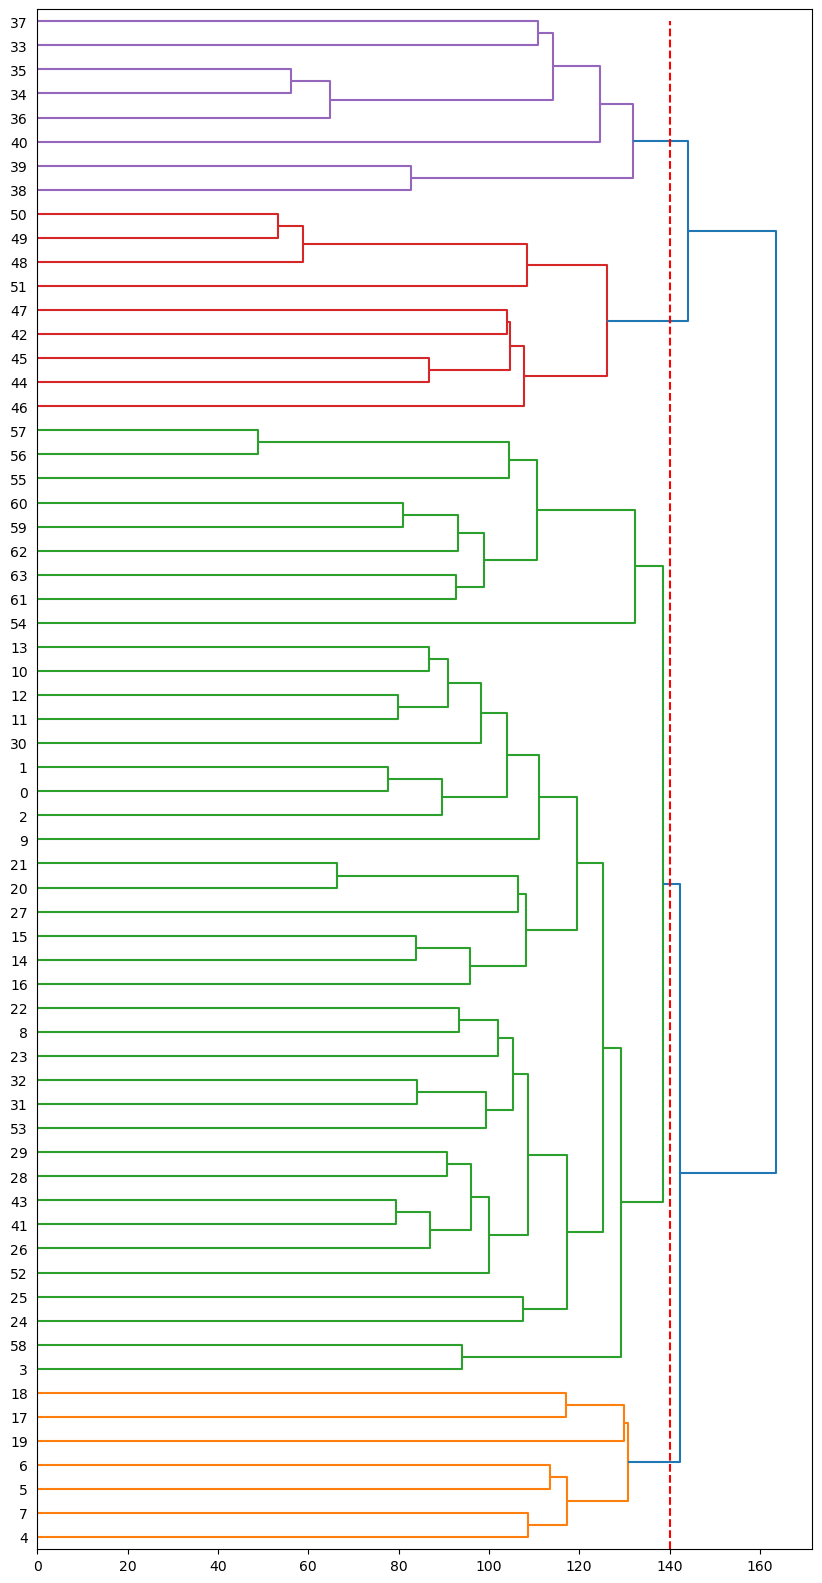

In [18]:
plt.figure(figsize=(10,20))
cut4 = hierarchy.dendrogram(hierarchy.complete(pc_data),
                            labels=pc_data.index, orientation='right', color_threshold=140, leaf_font_size=10)
plt.vlines(140,0,plt.gca().yaxis.get_data_interval()[1], colors='r', linestyles='dashed');